In [2]:
import numpy as np
import scipy.stats

import matplotlib.pyplot as plt
%matplotlib inline

# Лабораторна робота №4

### Регресійний аналіз. Виділення тренду

In [3]:
runif = scipy.stats.uniform()

In [5]:
n = 1000
N = 51
NG = 13

In [6]:
x = np.arange(n) + (runif.rvs(size=n) * N) / NG
y = N * runif.rvs(size=n) * x + NG * runif.rvs(size=n) + N

In [7]:
#Знаходимо коефіцієнти, використовуючи метод найменших квадратів
z = np.polyfit(x, y, deg=1)

In [8]:
#Формуємо лінійну функцію та апроксимацію
f = np.poly1d(z)
y_ = f(x)

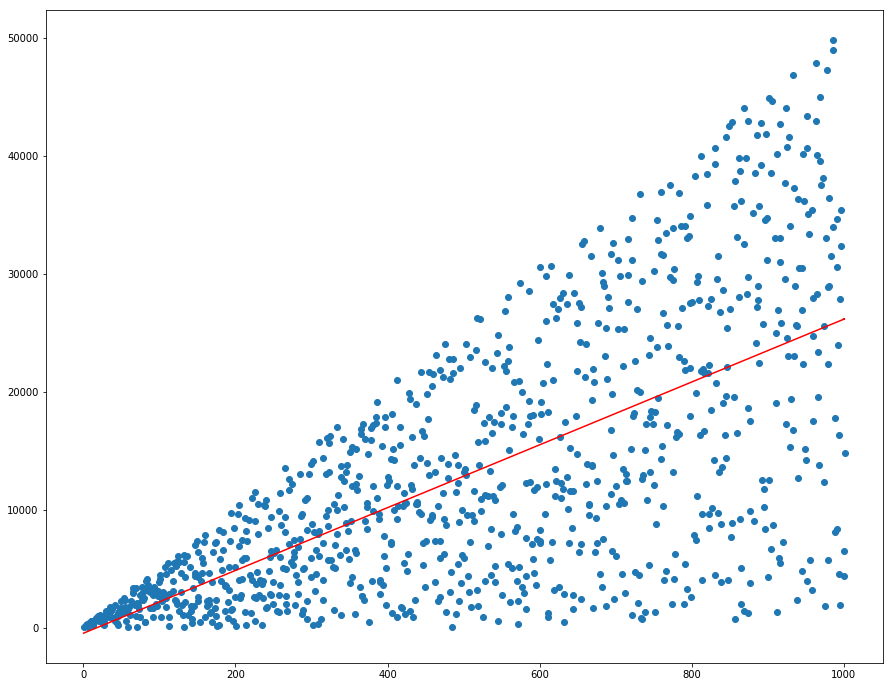

In [9]:
plt.figure(figsize=(15, 12))
plt.scatter(x, y)
plt.plot(x, y_, color="r")
plt.show()

In [10]:
e = y - y_
S = np.sum(e ** 2, axis=0) / (n - 2) * (1 - 1/n - (x - np.mean(x)) ** 2 / np.sum((x - np.mean(x))**2))

In [11]:
R = np.max(e / np.sqrt(S), axis=0)

In [12]:
R_delta = 4

In [14]:
if (R < R_delta):
    print("Викиди відсутні.")
else:
    print("Викиди присутні.")

Викиди відсутні.


### Перевіримо відповідність оцінок коефіцієнтів істинним значенням та адекватність моделі.

In [37]:
S2 = np.sum((y - y_) ** 2) / (n - 2)
S = np.sqrt(S2)

S2_x = np.sum(x - np.mean(x)) ** 2 / (n - 1)
S_x = np.sqrt(S2_x)

S2_beta = S / (S_x * np.sqrt(n - 1))
S_beta = np.sqrt(S2_beta)

S2_alpha = S * np.sqrt(1 / n + np.mean(x) ** 2 / ((n - 1) * S2_x))
S_alpha = np.sqrt(S2_alpha)

In [38]:
t_delta = 0.1257
F_delta = 1.25

In [39]:
b, a = z

In [40]:
np.abs(b) > t_delta * S_beta

False

In [41]:
np.abs(a) > t_delta * S_alpha

False

### Найкраща функціональна залежність

In [42]:
z1 = np.polyfit(x, y, deg=1)
f1 = np.poly1d(z1)
y_1 = f1(x)
S2_1 = np.sum((y - y_1) ** 2) / (n - 2)

z2 = np.polyfit(x, y, deg=2)
f2 = np.poly1d(z2)
y_2 = f2(x)
S2_2 = np.sum((y - y_2) ** 2) / (n - 2)

z3 = np.polyfit(x, y, deg=3)
f3 = np.poly1d(z3)
y_3 = f3(x)
S2_3 = np.sum((y - y_3) ** 2) / (n - 2)

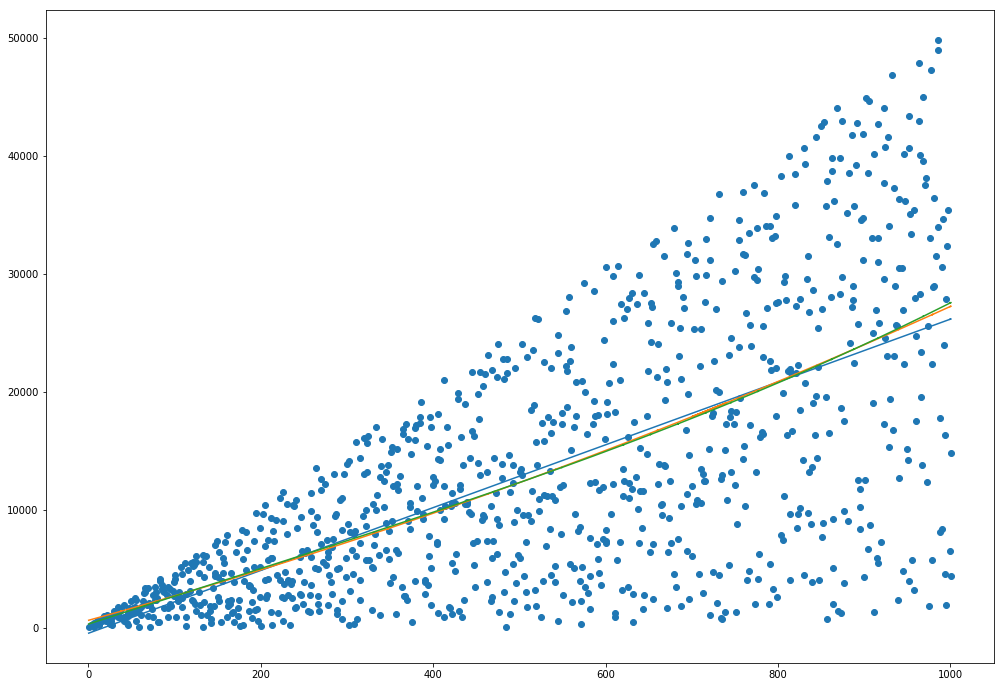

In [43]:
plt.figure(figsize=(17, 12))
plt.scatter(x, y)

plt.plot(x, y_1, label="1")
plt.plot(x, y_2, label="2")
plt.plot(x, y_3, label="3")

plt.show()

In [44]:
print("S2_1 =",S2_1) 
print("S2_2 =",S2_2) 
print("S2_3 =",S2_3)

S2_1 = 70756195.59633717
S2_2 = 70519475.69639343
S2_3 = 70505691.09945147
